Nesta alternativa, resolvi criar matrizes marvok a partir da planilha COMM5


# Intro

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Math #para escrever equações 
pd.set_option('display.float_format', lambda x: '%.3f' % x)


from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm
import seaborn as sns


import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt


from random import randint
from xmlrpc.client import Boolean
from tqdm import tqdm
import pandas as pd
import numpy as np
import quantecon as qe

In [2]:
import logging
log = logging.getLogger(__name__)
# logging.basicConfig(level=logging.DEBUG) 


def reset_logging():
    """
    Reset logging - Tira as definicoes de DEBUG, INFO, etc
    """
    for handler in logging.root.handlers[:]:
        logging.root.removeHandler(handler)

In [3]:
import importlib, sys, os, requests
from pathlib import Path

# sys.path.append(str(Path(os.path.abspath('')).parents[0]))
[sys.path.append(str(p)) for p in list(Path(os.path.abspath('')).parents) if len(list(Path(p).glob('*.gitignore'))) > 0 ]

import support_library.common as common
from support_library.viral import *

def reset_libs():
    _ = [importlib.reload(sys.modules[m]) for m in list(sys.modules) if 'support_library' in m]   
    
reset_libs()

In [4]:
RANDOM_SIZE   = 1000000
RANDOM_SIZE   = 10000
QTD_BINS      = 3
TEST_SIZE     = 0.08
RANDOM_STATE  = 2022
PREDITOR                 = ['vegetable-oil_price', 'vegetable-oil_production', 'vegetable-oil_exports']



- https://raw.githubusercontent.com/fkfouri/vegetable_oil_mkt/master/dataset/__by_month_commodity_types.csv
- https://raw.githubusercontent.com/fkfouri/vegetable_oil_mkt/master/dataset/__by_month_vegetable_oil.csv
- https://raw.githubusercontent.com/fkfouri/vegetable_oil_mkt/master/dataset/__by_month_full.csv

# Mercado de Oleo

## Dataset Completo
- USDA por comodity
- USDA Agrupado por Oleo Vegetal
- OECD Agrupado
- FAO Index Price


In [5]:
def get_dataset():
    df = pd.read_csv('https://raw.githubusercontent.com/fkfouri/vegetable_oil_mkt/master/dataset/__by_month_full.csv')
    print(df.shape)
    df['date'] = pd.to_datetime(df['date'])
    df.sort_values(by=['date'], ascending=[True], inplace=True)
    df.set_index(['date'], inplace=True)
    return df

%time df_full = get_dataset()
df_full.head()

(266, 139)
CPU times: total: 62.5 ms
Wall time: 394 ms


,reference,coconut_beginning-stocks,coconut_crush,coconut_domestic-consumption,coconut_ending-stocks,coconut_exports,coconut_feed-waste-dom-cons,coconut_food-use-dom-cons,coconut_imports,coconut_industrial-dom-cons,...,vegetable-oil_total-supply,vegetable-oil_oecd_consumption,vegetable-oil_oecd_ending-stocks,vegetable-oil_oecd_exports,vegetable-oil_oecd_food,vegetable-oil_oecd_food-fat-availability,vegetable-oil_oecd_human-consumption-per-capita,vegetable-oil_oecd_imports,vegetable-oil_oecd_other-use,vegetable-oil_oecd_production
date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7273.770,844.920,2541.320,6179.990,2.240,1.020,2490.870,1088.770,7469.760
2000-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7298.970,849.930,2562.660,6190.320,2.240,1.020,2504.980,1098.620,7494.420
2000-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7324.160,854.950,2584.010,6200.660,2.240,1.020,2519.100,1108.460,7519.090
2000-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7349.360,859.960,2605.360,6211.000,2.240,1.030,2533.210,1118.310,7543.750
2000-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7374.550,864.970,2626.710,6221.340,2.250,1.030,2547.320,1128.150,7568.420


In [6]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 266 entries, 2000-01-31 to 2022-02-28
Columns: 138 entries, reference to vegetable-oil_oecd_production
dtypes: float64(137), object(1)
memory usage: 288.9+ KB


In [7]:
df_full.dtypes

reference                                           object
coconut_beginning-stocks                           float64
coconut_crush                                      float64
coconut_domestic-consumption                       float64
coconut_ending-stocks                              float64
                                                    ...   
vegetable-oil_oecd_food-fat-availability           float64
vegetable-oil_oecd_human-consumption-per-capita    float64
vegetable-oil_oecd_imports                         float64
vegetable-oil_oecd_other-use                       float64
vegetable-oil_oecd_production                      float64
Length: 138, dtype: object

In [8]:
#Identificacao de colunas/atributos
features = [x for x in df_full.columns if ('exports' in x or 'production' in x or 'price' in x) and not ('olive' in x or 'cottonseed' in x) ]
prices   = [x for x in df_full.columns if 'price' in x and 'groundnut' not in x  ]

print(f'features: {len(features)} | {features}')
print("==" * 30)
print(f'prices: {len(prices)} | {prices}')

features: 26 | ['coconut_exports', 'coconut_price', 'coconut_production', 'palm-kernel_exports', 'palm-kernel_price', 'palm-kernel_production', 'palm_exports', 'palm_price', 'palm_production', 'peanut_exports', 'peanut_price', 'peanut_production', 'rapeseed_exports', 'rapeseed_price', 'rapeseed_production', 'soybean_exports', 'soybean_price', 'soybean_production', 'sunflower_exports', 'sunflower_price', 'sunflower_production', 'vegetable-oil_exports', 'vegetable-oil_price', 'vegetable-oil_production', 'vegetable-oil_oecd_exports', 'vegetable-oil_oecd_production']
prices: 8 | ['coconut_price', 'palm-kernel_price', 'palm_price', 'peanut_price', 'rapeseed_price', 'soybean_price', 'sunflower_price', 'vegetable-oil_price']


In [9]:
#REMOÇÃO DE CAMPOS NAN
df = df_full[features].copy()
print(df.shape)
df = df[df['sunflower_production'].notnull()]
df = df[df['sunflower_price'].notnull()]
print(df.shape)
df

(266, 26)
(234, 26)


,coconut_exports,coconut_price,coconut_production,palm-kernel_exports,palm-kernel_price,palm-kernel_production,palm_exports,palm_price,palm_production,peanut_exports,...,soybean_price,soybean_production,sunflower_exports,sunflower_price,sunflower_production,vegetable-oil_exports,vegetable-oil_price,vegetable-oil_production,vegetable-oil_oecd_exports,vegetable-oil_oecd_production
date,,,,,,,,,,,,,,,,,,,,,
2002-02-28,148.440,376.000,255.940,130.470,356.000,264.710,1527.920,352.980,2146.310,17.030,...,364.920,3204.320,166.180,578.000,620.920,3312.180,47.786,8559.630,2986.310,7954.130
2002-03-31,148.040,366.000,255.830,130.830,353.240,266.520,1543.880,359.000,2162.830,16.580,...,359.210,3222.400,168.850,557.000,625.580,3339.800,47.622,8591.720,3014.280,7983.170
2002-04-30,147.640,411.000,255.720,131.190,405.000,268.330,1559.830,360.070,2179.360,16.140,...,370.860,3240.470,171.530,552.000,630.250,3367.440,48.969,8623.810,3042.260,8012.210
2002-05-31,147.240,420.000,255.610,131.560,418.300,270.150,1575.790,384.910,2195.890,15.690,...,399.890,3258.550,174.200,574.000,634.920,3395.080,51.641,8655.950,3070.240,8041.250
2002-06-30,146.830,446.000,255.500,131.920,439.000,271.960,1591.750,426.130,2212.420,15.250,...,456.810,3276.620,176.880,595.000,639.580,3422.710,55.804,8688.040,3098.220,8070.290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,157.080,1493.640,290.610,276.780,1341.140,716.470,4092.220,1141.820,6229.440,35.640,...,1433.940,6354.170,988.220,1355.691,1703.690,7821.270,165.862,18894.320,7325.470,18174.560
2021-09-30,158.080,1485.000,291.080,278.380,1427.270,718.600,4103.190,1181.380,6246.960,35.020,...,1398.750,6350.750,994.670,1309.519,1717.600,7837.790,168.571,18923.870,7328.510,18207.820
2021-10-31,159.080,1922.860,291.560,279.970,1818.330,720.740,4114.150,1310.250,6264.470,34.400,...,1483.520,6347.330,1001.110,1420.528,1731.510,7854.300,184.837,18953.420,7331.560,18241.070


In [10]:
df.describe()

,coconut_exports,coconut_price,coconut_production,palm-kernel_exports,palm-kernel_price,palm-kernel_production,palm_exports,palm_price,palm_production,peanut_exports,...,soybean_price,soybean_production,sunflower_exports,sunflower_price,sunflower_production,vegetable-oil_exports,vegetable-oil_price,vegetable-oil_production,vegetable-oil_oecd_exports,vegetable-oil_oecd_production
count,234.000,234.000,234.000,234.000,234.000,234.000,234.000,234.000,234.000,234.000,...,234.000,234.000,234.000,234.000,234.000,234.000,234.000,234.000,234.000,234.000
mean,154.793,1037.208,277.760,233.840,956.092,523.365,3226.635,763.075,4406.418,19.901,...,882.535,4857.446,563.021,966.043,1174.819,5990.575,103.046,14277.728,5545.769,13471.372
std,10.334,412.612,12.313,41.691,378.930,139.269,805.918,244.906,1262.844,6.470,...,272.357,980.073,284.888,334.951,331.668,1329.965,32.741,3166.837,1307.176,3118.232
min,123.000,366.000,248.500,130.470,353.240,264.710,1527.920,352.980,2146.310,12.830,...,359.210,3204.320,166.180,543.000,620.920,3312.180,47.622,8559.630,2986.310,7954.130
25%,148.055,702.250,270.998,219.213,655.290,399.255,2515.020,577.495,3275.315,15.468,...,719.372,4057.825,329.412,719.643,886.732,5027.562,78.436,11538.903,4463.065,10815.903
50%,154.895,953.500,275.410,245.990,878.330,530.115,3399.860,732.000,4468.605,16.805,...,832.990,4667.785,493.780,856.470,1127.385,5927.510,97.910,14325.960,5663.720,13418.630
75%,160.400,1387.287,287.767,263.450,1232.705,642.967,4014.682,886.188,5503.118,23.133,...,1016.713,5831.602,867.900,1174.505,1528.378,7278.573,121.403,17158.577,6772.868,16394.708
max,177.920,2256.000,302.500,283.170,2307.630,725.000,4325.500,1377.220,6299.500,40.580,...,1574.670,6381.500,1122.670,2045.000,1761.580,7887.340,184.837,19012.500,7349.260,18307.580


## Correlação

Paired density and scatterplot matrix

https://seaborn.pydata.org/examples/pair_grid_with_kde.html

In [11]:
if False:
    %time
    sns.set_theme(style="white")

    g = sns.PairGrid(df, diag_sharey=False)
    g.map_upper(sns.scatterplot, s=15)
    g.map_lower(sns.kdeplot)
    g.map_diag(sns.kdeplot, lw=2)

![Alt text](https://raw.githubusercontent.com/fkfouri/vegetable_oil_mkt/master/images/Compare.png)

## Dendograma

In [12]:
if False:
    plt.figure(figsize=(25,10))
    dendrogram = sch.dendrogram(sch.linkage(df, method  = "ward"))

    plt.title('Dendrogram')

    # plt.xlabel('Customers')
    plt.ylabel('Euclidean distances')
    %time plt.show()

# Markov
Observaçoes:
- Sera que o outcome deveria ser calculado em funcao do dado? Não deveria ser uma referencia Exogena? Exemplos (Open Interest da soja eu tenho). No exemplo do VIRAL... ele pega o outcome como o volume de negocios.
- O que fazer com os preditores dentro do random_set (??)

Tentativa de segregar os patterns em, para ter padroes menores:
- product_variation
- exports_variation
- price_variation



In [13]:
# !pip install --upgrade quantecon numba tqdm --quiet

## Library

In [14]:
get_divison  = lambda size: [item / size for item in list(range(size + 1))]
get_labels   = lambda size, start=0: [f'{chr( (item % 26 + start) + 65  )}{ "" if item // 26 <= 0 else item // 26 }' for item in list(range(size))]
get_full     = lambda size: [ (chr(i + 65), f'{j / size} < x <= { (j+1) / size}' ) for i , j in enumerate(range(size))]
get_bins     = lambda _input_array, size:  np.round(np.linspace(_input_array.min(), _input_array.max(), size + 1), 6).tolist()


def read_kwarg_list(kwargs, name, _else_conditions = None):
    if name in kwargs and isinstance(kwargs[name], list):
        return kwargs[name]
    return _else_conditions


def read_kwarg_bool(kwargs, name):
    if name in kwargs and isinstance(kwargs[name], Boolean):
        return kwargs[name]
    return False        


def convet_collection_to_dataframe(collection):
    """
    Concatena todas as colecoes
    Remove os np.inf e np.nan, gerados pelo pc_change
    """
    df_out = pd.concat(collection)
    
    log.debug(f'Before dropping NaNs: {df_out.shape}')
    df_out.replace([np.inf, -np.inf], np.nan, inplace=True)
    df_out = df_out.dropna(how='any') 
    log.debug(f'After dropping NaNs: {df_out.shape}')
    return df_out

## Geração do Random Sets

In [15]:
#Gera uma serie de forma randomica. Pega amostras do dataset com horizonte de 3 a 18 linhas (meses) e 
def get_random_sets(input_dataframe: pd.DataFrame, 
                    size = 100000,
                    **kwargs):
    
    # take random sets of sequential rows 
    new_set = []

    # breakpoint()
    
    log.debug(f'AQUI:   {size}')
    for row_set in (tqdm(iterable = range(0, size), bar_format='{desc:<15}{percentage:3.0f}%|{bar:50}{r_bar}' ) ):
        
        # obtem de forma randomica uma amostra de n linhas do dataset entre 3 e 18 meses
        row_quant     = randint(3, 18)
        row_start     = randint(0, len(input_dataframe) - row_quant)
        row_finish    = row_start + row_quant

        market_subset = input_dataframe.iloc[row_start:row_finish]
        Close_Date    = max(market_subset['date'])
        
        log.debug(f'AQUI:   {row_start} |{row_finish} | {market_subset.shape} | {Close_Date}')

        if row_set%(size//5)==0:
            pass
            print(f'row_set: {row_set:<6} | row_quant: {row_quant:2} | rows: {row_start:>6}-{row_finish-1:<6} | market_subset: {str(market_subset.shape):^10} | Close_Date: {Close_Date:%m/%d/%Y}')
               
        ref = {}
        ref['Sequence_ID']  = [row_set] * row_quant
        ref['Close_Date']   = [Close_Date] * row_quant
        ref['ref_date']     = market_subset['date']
        ref['size_dataset'] = [len(market_subset) - 2] * row_quant  # subtracao de dois devido limpeza NaN
        
#         # TODO: Leitura dos Preditores, Tipo Media do período  
#         # parece ser irrelevante... pois houve uma interpolcao durante upstream. 
#         # A Media tente a ser a mesma para datasets dentro de um mesmo ano
#         for name, value in market_subset[PREDITOR].iteritems():
#             ref[f'{name}_mean']       = value.mean() 
        

        # Colunas que NAO desejo realizar a variacao
        bypass_ref = {}
        
        if 'bypass' in kwargs and isinstance(kwargs['bypass'], list):
            for _col in kwargs['bypass']:
                bypass_ref[_col] = market_subset[_col]
                
                       
        # columnas que desejo ter as variacoes em relacao a linha anterior (date)
        columns_ref = {}
        if 'columns' in kwargs and isinstance(kwargs['columns'], list):
            for _col in kwargs['columns']:
                if _col in input_dataframe.columns and _col not in bypass_ref:
                    columns_ref[_col] = market_subset[_col]
                    columns_ref[f'{_col}_variation'] = market_subset[_col].pct_change()
                    
                    if 'outcomes' in kwargs and isinstance(kwargs['outcomes'], list) and _col in kwargs['outcomes']:
                        columns_ref[f'{_col}_outcome'] = market_subset[_col].diff(-1) * -1
        

               
        #merge dictionaries
        ref = {**ref, **bypass_ref, **columns_ref}
        
        new_set.append(pd.DataFrame(ref))
        
    return new_set

# logging.basicConfig(level=logging.DEBUG)
# get_random_sets(df.reset_index(), RANDOM_SIZE, columns=features,  outcomes=features, bypass=PREDITOR)

In [16]:
%time my_set_case2 = get_random_sets(df.reset_index(), RANDOM_SIZE, columns=features,  outcomes=features, bypass=[])

                 0%|                                                  | 6/10000 [00:00<03:03, 54.54it/s]

row_set: 0      | row_quant:  6 | rows:     38-43     | market_subset:  (6, 27)   | Close_Date: 02/28/2006


                20%|██████████                                        | 2010/10000 [00:37<02:39, 50.15it/s]

row_set: 2000   | row_quant: 11 | rows:     29-39     | market_subset:  (11, 27)  | Close_Date: 10/31/2005


                40%|████████████████████                              | 4012/10000 [01:12<01:37, 61.32it/s]

row_set: 4000   | row_quant:  7 | rows:    153-159    | market_subset:  (7, 27)   | Close_Date: 10/31/2015


                60%|██████████████████████████████                    | 6011/10000 [01:49<01:02, 63.99it/s]

row_set: 6000   | row_quant:  7 | rows:    142-148    | market_subset:  (7, 27)   | Close_Date: 11/30/2014


                80%|████████████████████████████████████████          | 8010/10000 [02:21<00:31, 63.24it/s]

row_set: 8000   | row_quant:  8 | rows:     19-26     | market_subset:  (8, 27)   | Close_Date: 09/30/2004


               100%|██████████████████████████████████████████████████| 10000/10000 [02:55<00:00, 57.00it/s]

CPU times: total: 2min 56s
Wall time: 2min 55s


In [17]:
%time df1 = convet_collection_to_dataframe(my_set_case2)
print(df1.shape)
df1

CPU times: total: 1.36 s
Wall time: 1.35 s
(82507, 82)


,Sequence_ID,Close_Date,ref_date,size_dataset,coconut_exports,coconut_exports_variation,coconut_exports_outcome,coconut_price,coconut_price_variation,coconut_price_outcome,...,vegetable-oil_price_outcome,vegetable-oil_production,vegetable-oil_production_variation,vegetable-oil_production_outcome,vegetable-oil_oecd_exports,vegetable-oil_oecd_exports_variation,vegetable-oil_oecd_exports_outcome,vegetable-oil_oecd_production,vegetable-oil_oecd_production_variation,vegetable-oil_oecd_production_outcome
39,0,2006-02-28,2005-10-31,4,171.420,-0.001,-0.210,587.000,0.050,-5.000,...,-1.367,10841.200,0.005,56.190,4126.270,0.008,34.400,10159.040,0.004,45.050
40,0,2006-02-28,2005-11-30,4,171.210,-0.001,-0.210,582.000,-0.009,-29.000,...,-1.949,10897.390,0.005,56.210,4160.670,0.008,34.400,10204.090,0.004,45.050
41,0,2006-02-28,2005-12-31,4,171.000,-0.001,-2.170,553.000,-0.050,16.000,...,0.181,10953.600,0.005,29.420,4195.070,0.008,7.780,10249.140,0.004,25.820
42,0,2006-02-28,2006-01-31,4,168.830,-0.013,-2.180,569.000,0.029,22.000,...,1.315,10983.020,0.003,29.390,4202.850,0.002,7.780,10274.960,0.003,25.830
83,1,2009-10-31,2009-06-30,4,147.750,0.029,4.130,747.000,-0.113,-62.000,...,-10.817,12632.080,0.006,71.150,4923.560,0.000,2.430,11764.930,0.003,36.930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,9999,2009-10-31,2009-05-31,13,143.620,0.030,4.130,842.500,0.128,-95.500,...,-5.885,12560.940,0.006,71.140,4921.140,0.000,2.420,11728.010,0.003,36.920
83,9999,2009-10-31,2009-06-30,13,147.750,0.029,4.130,747.000,-0.113,-62.000,...,-10.817,12632.080,0.006,71.150,4923.560,0.000,2.430,11764.930,0.003,36.930
84,9999,2009-10-31,2009-07-31,13,151.880,0.028,4.120,685.000,-0.083,62.000,...,7.951,12703.230,0.006,71.130,4925.990,0.000,2.420,11801.860,0.003,36.920
85,9999,2009-10-31,2009-08-31,13,156.000,0.027,4.120,747.000,0.091,-46.000,...,-4.607,12774.360,0.006,71.140,4928.410,0.000,2.430,11838.780,0.003,36.920


## Divisao em Quantis

Processo de Discretização em **n** quantis. Processo de simplificação dos dados categorizados e criacao de grupos.

Significa que para uma data qualquer... os possiveis acontecimentos predecessores *(LHM, MLH, etc)* que o fizeram chegar a aquele resultado.

In [18]:
def quantiles_v2(df: pd.DataFrame, size = 3):
    df    = df.copy()

    columns_production  = []
    columns_exports     = []
    columns_prices      = []
    columns_veg         = []
    
    labels = ['L','M','H']
    for i, col in enumerate(df.columns):
        column_name         = f'{col}_qcut'
        
        # EXecuta o qcut em campos que tem no nome a referencia 'variation' mas que nao seja tipo 'vegetable'
        if 'variation' in col and 'vegetable' not in col:
        
            if 'exports' in col:
#                 labels = get_labels(size, 0*size)
                df[column_name]     = pd.qcut(df[col], q=size, labels = labels)
                columns_exports.append(column_name)    
                
            elif 'price' in col:
#                 labels = get_labels(size, 2*size)
                df[column_name]     = pd.qcut(df[col], q=size, labels = labels)
                columns_prices.append(column_name) 
                
            elif 'production' in col:
#                 labels = get_labels(size, 4*size)

                df[column_name]     = pd.qcut(df[col], q=size, labels = labels)
                columns_production.append(column_name)

  
        
        elif 'variation' in col and 'vegetable' in col and 'oecd' not in col:
#             labels = get_labels(size, 6*size)
            df[column_name]     = pd.qcut(df[col], q=size, labels = labels)
            columns_veg.append(column_name) 
            
            
            
    def get_equation(columns):
        return ' + '.join( [f'df["{col}"].astype(str)' for col in columns] )
        
    df['event_pattern_production']  = eval(get_equation(columns_production)) 
    df['event_pattern_exports']     = eval(get_equation(columns_exports)) 
    df['event_pattern_prices']      = eval(get_equation(columns_prices)) 
    df['veg_pattern']               = eval(get_equation(columns_veg)) 
    total_patterns = 4
    
    outcomes = [x for x in df1.columns if 'outcome' in x  ]
    
    columns_fixed   = list(df.columns[:4])
    columns_sort    = sorted(list(df.columns[4:-total_patterns]))
#     columns_sort    = sorted(columns_production + columns_exports + columns_prices + outcomes)
    columns_event   = sorted(list(df.columns[-total_patterns:]))
    

    return df[columns_fixed + columns_event + columns_sort].sort_values(by = ['Close_Date', 'Sequence_ID'], ascending=[False, True])

    

In [19]:
df2 = quantiles_v2(df1, size=QTD_BINS)
print(df2.shape)
df2.tail()

(82507, 110)


,Sequence_ID,Close_Date,ref_date,size_dataset,event_pattern_exports,event_pattern_prices,event_pattern_production,veg_pattern,coconut_exports,coconut_exports_outcome,...,vegetable-oil_oecd_production_outcome,vegetable-oil_oecd_production_variation,vegetable-oil_price,vegetable-oil_price_outcome,vegetable-oil_price_variation,vegetable-oil_price_variation_qcut,vegetable-oil_production,vegetable-oil_production_outcome,vegetable-oil_production_variation,vegetable-oil_production_variation_qcut
1,2378,2002-04-30,2002-03-31,1,MMHLLHH,MMMLLLL,MHHLLHH,HMM,148.040,-0.400,...,29.040,0.004,47.622,1.347,-0.003,M,8591.720,32.090,0.004,M
1,3378,2002-04-30,2002-03-31,1,MMHLLHH,MMMLLLL,MHHLLHH,HMM,148.040,-0.400,...,29.040,0.004,47.622,1.347,-0.003,M,8591.720,32.090,0.004,M
1,4350,2002-04-30,2002-03-31,1,MMHLLHH,MMMLLLL,MHHLLHH,HMM,148.040,-0.400,...,29.040,0.004,47.622,1.347,-0.003,M,8591.720,32.090,0.004,M
1,5201,2002-04-30,2002-03-31,1,MMHLLHH,MMMLLLL,MHHLLHH,HMM,148.040,-0.400,...,29.040,0.004,47.622,1.347,-0.003,M,8591.720,32.090,0.004,M
1,9094,2002-04-30,2002-03-31,1,MMHLLHH,MMMLLLL,MHHLLHH,HMM,148.040,-0.400,...,29.040,0.004,47.622,1.347,-0.003,M,8591.720,32.090,0.004,M


In [20]:
len(df2['veg_pattern'].unique())

25

## Compressing*


Unifica os *patterns* em uma coluna. 

A saida tem um shape que retorna ao tamanho tamanho do **RANDOM_SIZE**.

NAO é mais necessario a referencia de Date. O interesse eh somente pelos padroes.

Verificar:
- Se deve ou nao usar o SET. O importante é identificar as transições de estados anteriores?

In [21]:
def compress_v1(df: pd.DataFrame, **kwargs):
    """
    Nao eh aplicado o set. Consegue-se observar as transicoes de estados que anteciparam o estado corrente. 
    Pode ter repeticao. Acho mais importante! 
    """
    columns         = read_kwarg_list(kwargs,'columns')
    outcomes        = read_kwarg_list(kwargs,'outcomes')
    predictors      = read_kwarg_list(kwargs,'predictors')
    event_patterns  = [x for x in df.columns if 'event_pattern' in x  ]
    
    #Agrupa os event_pattern unicos em uma unica coluna
    if columns and len(event_patterns) >= 1:
        # Neste ponto que nao se aplica o set
        df_step1 = df.groupby(columns)[event_patterns].\
                    agg(lambda x: ','.join( list( x ) ) )

    #Agrupa os veg_pattern somente em uma unica coluna
    veg_pattern = [x for x in df.columns if 'veg_pattern' in x  ]   
    if columns and len(veg_pattern) >= 1:
        df_step1a = df.groupby(columns)[veg_pattern].\
                    agg(lambda x: ','.join( list(  x ) ) )
        
        df_step1 = pd.merge(df_step1, df_step1a, on=columns, how='inner')
        

    if predictors and len(predictors) >= 1:
        df_step1b = df.groupby(columns)[predictors].mean()
        
        df_step1 = pd.merge(df_step1, df_step1b, on=columns, how='inner')        
        

    #Agrupa os valores dos outcomes pela media
    if columns and outcomes:
        df_step2 = df.groupby(columns)[outcomes].mean()
        
    compressed_set = pd.merge(df_step1, df_step2, on=columns, how='inner')
    
    return compressed_set
    
    agrupador      = 'events_pattern'
    
#     compressed_set[agrupador] = compressed_set[event_patterns].agg(','.join, axis=1)
       
    # Usando funcao de conjuntos para escolher as colunas da saida. A lista delta nao contem os agregadores tipo event_patterns
    array1  = np.array(list(compressed_set.columns))
    array2  = np.array([agrupador]) # np.array(event_patterns + [agrupador])
    delta   = np.setdiff1d(array1, array2, assume_unique=True)

    return compressed_set[ [event_patterns] + list(delta)]




## Compressing

In [22]:
#Lista de features tipo outcome
outcomes = [x for x in df1.columns if 'outcome' in x  ]
print(f'outcomes: {len(outcomes)} items\n{", ".join(outcomes[:3])}, ..., {", ".join(outcomes[-3:])}')

outcomes: 26 items
coconut_exports_outcome, coconut_price_outcome, coconut_production_outcome, ..., vegetable-oil_production_outcome, vegetable-oil_oecd_exports_outcome, vegetable-oil_oecd_production_outcome


In [23]:
df3 = compress_v1(df2, columns = ['Sequence_ID', 'Close_Date'],  outcomes = outcomes)
print(df3.shape)
df3.tail()

(9750, 30)


,,event_pattern_exports,event_pattern_prices,event_pattern_production,veg_pattern,coconut_exports_outcome,coconut_price_outcome,coconut_production_outcome,palm-kernel_exports_outcome,palm-kernel_price_outcome,palm-kernel_production_outcome,...,soybean_price_outcome,soybean_production_outcome,sunflower_exports_outcome,sunflower_price_outcome,sunflower_production_outcome,vegetable-oil_exports_outcome,vegetable-oil_price_outcome,vegetable-oil_production_outcome,vegetable-oil_oecd_exports_outcome,vegetable-oil_oecd_production_outcome
Sequence_ID,Close_Date,,,,,,,,,,,,,,,,,,,,,
9995,2010-01-31,"LMMHHLH,HMMMMHM,HMMMMHM,HMMMMHM,HMMMMHM,HMMMMH...","MHMLLLL,MMHLMHH,LMMLLLL,LMMLLLL,HHHLHHH,HHHLHH...","MMMLHLH,HMLLHHM,HMLLHHM,HMLLHHM,HMLLHHM,HMLLHH...","LLL,MHH,MMH,MMH,MHH,MHH,MLH,MLH,MHH,MLH,MMH,MH...",3.664,3.385,0.860,0.349,26.097,2.277,...,13.462,38.305,-0.288,16.077,1.461,25.026,2.196,69.280,4.558,38.957
9996,2007-05-31,"LHLLHHM,LHLLHHM,LHLLHHM,LHLLHHM,LHLLHHM,HMHLLL...","HMHHMMH,MLLHLLM,MMMHMMM,HHHLHHH,HHHLHHM,MMMLLM...","LLLLLHM,LLLLLHM,LLLLLHM,LLLLLHM,LLLLLHM,HHHHHL...","MHM,MLM,MMM,MHM,MHL,MMH,MMM,MMM,MHM",-0.248,32.000,0.446,1.641,33.333,2.237,...,17.391,10.740,-1.614,18.333,-1.316,17.616,2.967,37.657,21.934,38.661
9997,2018-06-30,"MLLMLLL,MMLMLLL,MLLMLLL,MLLMLLL,HHMMMMM,HHMMMM...","LHHLMHM,LHMLHML,HMLHHMM,LLLMLLM,LLHLLMM,LLMLLL...","HHHMMLM,HHHMMLM,HHHMMLL,HHHMMLL,MMMLLMM,MMMLLM...","LHM,LMM,LMM,LLM,HML,HLL,HML,HML,HLL",1.664,-74.418,0.919,1.337,-52.260,3.014,...,-11.208,9.981,4.468,-5.249,5.374,26.640,-1.611,50.791,29.158,48.854
9998,2016-03-31,"LLLLLMM,LLLLLLM,LLLLLLM,LLLLLLM,LLLLLLM,LLLLLL...","LMMLLLL,MHMLLLL,LLLLMLL,MLLLMMH,HMMLHHH,MLMHHM...","LLLMLMM,MLLMLMM,LLLMLMM,MLLMLMM,LLLMLMM,MLLMLM...","LLL,LML,LLL,LML,LHL,LML,LLL,LLL,LML,LHL,LLL,LM...",-1.671,21.055,-0.176,-1.080,14.294,-0.762,...,-2.212,13.568,7.831,-0.823,6.914,-10.822,0.167,10.791,-9.011,9.251
9999,2009-10-31,"LMMHHLH,LMMHHLH,LMMHHLH,LMMHHLH,HMMMMHM,HMMMMH...","LLLLLLL,LLLLLLL,LLLLLLL,MHMLLLL,MMHLMHH,LMMLLL...","LMMLHLH,MMMLHLH,LMMMHLH,MMMLHLH,HMLLHHM,HMLLHH...","LLL,LLL,LLL,LLL,MHH,MMH,MMH,MHH,MHH,MLH,MLH,MH...",2.454,-31.077,0.576,0.652,-20.542,2.264,...,-23.386,26.922,1.380,-25.385,3.852,20.713,-1.955,61.793,6.124,36.040


## Simplificando o Dataset


O objetivo aqui é remover variacoes de pouca relevancia.

Exemplo: 
- A flutuação de + ou - 10 centavos de dolar pode não ser representativo em um dataset de preço da tonela oleo de soja ... que opera na casa de milhares de dolares. Mas 10 centavos é representativo para o cambio dolar/real, que opera na casa  5 BRL ~ 1 USD.
- Pode ser até erro de precisão. 1000 kg ou 999 kg é a mesma coisa em termos de ordem de grandeza

In [24]:
df3[[x for x in df3.columns if 'vegetable' in x  ]].describe()

,vegetable-oil_exports_outcome,vegetable-oil_price_outcome,vegetable-oil_production_outcome,vegetable-oil_oecd_exports_outcome,vegetable-oil_oecd_production_outcome
count,9750.000,9750.000,9750.000,9750.000,9750.000
mean,19.198,0.454,45.227,19.167,45.039
std,18.671,3.593,21.801,14.872,25.136
min,-28.240,-29.180,-9.230,-24.600,-17.340
25%,7.767,-1.290,31.710,11.647,31.120
50%,19.859,0.142,47.448,21.831,43.278
75%,30.497,1.855,61.247,28.625,61.943
max,136.430,15.540,176.590,127.930,158.470


In [25]:
CUT_OFF           = .5 #variacao maior que .5 pontos
TARGET            = 'vegetable-oil_price_outcome'

print(f'All available data: { df3.shape[0]}')
df4 = df3[ abs( df3[TARGET] ) > CUT_OFF ][:]
print(f'Relevant changes: { df4.shape[0]}')

All available data: 9750
Relevant changes: 7878


In [26]:
df4[[x for x in df4.columns if 'vegetable' in x]].describe()

,vegetable-oil_exports_outcome,vegetable-oil_price_outcome,vegetable-oil_production_outcome,vegetable-oil_oecd_exports_outcome,vegetable-oil_oecd_production_outcome
count,7878.000,7878.000,7878.000,7878.000,7878.000
mean,18.703,0.565,43.594,18.936,43.521
std,19.222,3.987,21.904,15.098,24.738
min,-28.240,-29.180,-9.230,-24.600,-17.340
25%,7.765,-1.590,30.640,11.646,31.115
50%,19.597,0.719,44.920,21.274,42.213
75%,28.598,2.442,58.268,27.970,58.861
max,136.430,15.540,176.590,127.930,158.470


## Directions

Neste ponto, o objetivo é criar um flag 0/1 (False/True) para informar se a sequencia de transição direcionar para crescimento (bulish) ou para caida (bearish).


In [27]:
def directions(df: pd.DataFrame):
    """
    Direction tipo 1 significa crescimento bullish, e 0 significa bearish
    
    A saida sai ordenada pela data, para permitir a separacao no treino teste de forma coerente. 
    Embora o campo Close_Date nao seja mais necessario, foi mantido apenas para check visual.
    """
    df    = df.copy()

    for col in [x for x in df.columns if 'outcome' in x ]:
        column_name         = f'{col}_direction'
        df[column_name]     = df[col].apply(lambda x: 1 if x > 0 else 0 )

    # quantidade de colunas sem outcome na descricao
    qtd_cols = len([x for x in df.columns if 'outcome' not in x])
        
    columns_fixed   = list(df.columns[:qtd_cols])
    columns_sort    = sorted(list(df.columns[qtd_cols:]))
    
#     return df[columns_fixed + columns_sort].sort_values(by = ['Sequence_ID'], ascending=[True]) \
#             .reset_index().set_index(['Sequence_ID', 'Close_Date'])

    return df[columns_fixed + columns_sort].sort_values(by = ['Close_Date'], ascending=[True]) \
            .reset_index().set_index(['Sequence_ID', 'Close_Date'])

In [28]:
#sem simplificacao
%time df5 = directions(df4)
print(df5.shape)
df5

CPU times: total: 141 ms
Wall time: 128 ms
(7878, 56)


,,event_pattern_exports,event_pattern_prices,event_pattern_production,veg_pattern,coconut_exports_outcome,coconut_exports_outcome_direction,coconut_price_outcome,coconut_price_outcome_direction,coconut_production_outcome,coconut_production_outcome_direction,...,vegetable-oil_exports_outcome,vegetable-oil_exports_outcome_direction,vegetable-oil_oecd_exports_outcome,vegetable-oil_oecd_exports_outcome_direction,vegetable-oil_oecd_production_outcome,vegetable-oil_oecd_production_outcome_direction,vegetable-oil_price_outcome,vegetable-oil_price_outcome_direction,vegetable-oil_production_outcome,vegetable-oil_production_outcome_direction
Sequence_ID,Close_Date,,,,,,,,,,,,,,,,,,,,,
2378,2002-04-30,MMHLLHH,MMMLLLL,MHHLLHH,HMM,-0.400,0,45.000,1,-0.110,0,...,27.640,1,27.980,1,29.040,1,1.347,1,32.090,1
3378,2002-04-30,MMHLLHH,MMMLLLL,MHHLLHH,HMM,-0.400,0,45.000,1,-0.110,0,...,27.640,1,27.980,1,29.040,1,1.347,1,32.090,1
1393,2002-04-30,MMHLLHH,MMMLLLL,MHHLLHH,HMM,-0.400,0,45.000,1,-0.110,0,...,27.640,1,27.980,1,29.040,1,1.347,1,32.090,1
4350,2002-04-30,MMHLLHH,MMMLLLL,MHHLLHH,HMM,-0.400,0,45.000,1,-0.110,0,...,27.640,1,27.980,1,29.040,1,1.347,1,32.090,1
5201,2002-04-30,MMHLLHH,MMMLLLL,MHHLLHH,HMM,-0.400,0,45.000,1,-0.110,0,...,27.640,1,27.980,1,29.040,1,1.347,1,32.090,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,2021-12-31,"LLLHMML,LLLHMML,LLLHMML","HHHMHHH,HMHMMHH,HHHLMMM","MLLMMLL,MLLMMLL,MLLMMLL","LHL,LHL,LML",-0.577,0,129.217,1,-0.140,0,...,-15.103,0,11.647,1,18.943,1,7.734,1,2.017,1
2685,2021-12-31,LLLHMML,HHHLMMM,MLLMMLL,LML,-0.580,0,250.590,1,-0.140,0,...,-15.110,0,11.650,1,18.940,1,15.453,1,2.010,1
4101,2021-12-31,"LLLHMML,LLLHMML","HMHMMHH,HHHLMMM","MLLMMLL,MLLMMLL","LHL,LML",-0.575,0,167.385,1,-0.140,0,...,-15.100,0,11.645,1,18.945,1,8.654,1,2.015,1


## Split Train/Test

O Shuffle esta desativado. Não sera realizado embaralhamento de serie temporal, para evitar o erro de prever o passado com dados do futuro.

In [29]:
event_patterns = [x for x in df5.columns if 'veg_pattern' in x  ]
print(event_patterns)

feature_directions = event_patterns + [x for x in df5.columns if 'direction' in x and 'vegetable-oil' not in x ]
print(feature_directions)

predictors = [x for x in df5.columns if 'direction' in x and 'vegetable-oil' in x and 'oecd' not in x ]
predictors

['veg_pattern']
['veg_pattern', 'coconut_exports_outcome_direction', 'coconut_price_outcome_direction', 'coconut_production_outcome_direction', 'palm-kernel_exports_outcome_direction', 'palm-kernel_price_outcome_direction', 'palm-kernel_production_outcome_direction', 'palm_exports_outcome_direction', 'palm_price_outcome_direction', 'palm_production_outcome_direction', 'peanut_exports_outcome_direction', 'peanut_price_outcome_direction', 'peanut_production_outcome_direction', 'rapeseed_exports_outcome_direction', 'rapeseed_price_outcome_direction', 'rapeseed_production_outcome_direction', 'soybean_exports_outcome_direction', 'soybean_price_outcome_direction', 'soybean_production_outcome_direction', 'sunflower_exports_outcome_direction', 'sunflower_price_outcome_direction', 'sunflower_production_outcome_direction']


['vegetable-oil_exports_outcome_direction',
 'vegetable-oil_price_outcome_direction',
 'vegetable-oil_production_outcome_direction']

In [30]:
# Incluido os predictors aqui, pois preciso que aparecam no dataset
X = df5[feature_directions + predictors]
y = df5[predictors]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=False)
print(f'X_train: {X_train.shape} | X_test: {X_test.shape} | y_train: {y_train.shape} | y_test: {y_test.shape} ')

X_train: (7247, 25) | X_test: (631, 25) | y_train: (7247, 3) | y_test: (631, 3) 


In [31]:
X_train = X_train.sort_values(by=['Sequence_ID'])
X_test = X_test.sort_values(by=['Sequence_ID'])

## Bullish/Bearish Cenario

In [32]:
print(X_train.shape, "Metade de linhas:", X_train.shape[0]/2)
print('=='*40)
print('Vou usar a referencia de "sunflower_production_outcome_direction", fator pertubador de mercado. ')
print('=='*40)

X_train[[x for x in X_train.columns if 'direction' in x ]].sum()

(7247, 25) Metade de linhas: 3623.5
Vou usar a referencia de "sunflower_production_outcome_direction", fator pertubador de mercado. 


coconut_exports_outcome_direction             4128
coconut_price_outcome_direction               3935
coconut_production_outcome_direction          4239
palm-kernel_exports_outcome_direction         5366
palm-kernel_price_outcome_direction           3816
palm-kernel_production_outcome_direction      6563
palm_exports_outcome_direction                6366
palm_price_outcome_direction                  3665
palm_production_outcome_direction             6560
peanut_exports_outcome_direction              4005
peanut_price_outcome_direction                3983
peanut_production_outcome_direction           4326
rapeseed_exports_outcome_direction            6083
rapeseed_price_outcome_direction              3843
rapeseed_production_outcome_direction         6228
soybean_exports_outcome_direction             4074
soybean_price_outcome_direction               3737
soybean_production_outcome_direction          6402
sunflower_exports_outcome_direction           5231
sunflower_price_outcome_directi

In [33]:
TARGET

'vegetable-oil_price_outcome'

In [34]:
#vegetable-oil_price_variation
direction_reference = 'vegetable-oil_price_outcome_direction'
df6_pos = X_train.loc[X_train[direction_reference] > 0]
df6_neg = X_train.loc[X_train[direction_reference] <= 0]
print(f'Original: {X_train.shape} | df6_pos: {df6_pos.shape} | df6_neg: {df6_neg.shape}')
df6_pos.head()

Original: (7247, 25) | df6_pos: (3695, 25) | df6_neg: (3552, 25)


,,veg_pattern,coconut_exports_outcome_direction,coconut_price_outcome_direction,coconut_production_outcome_direction,palm-kernel_exports_outcome_direction,palm-kernel_price_outcome_direction,palm-kernel_production_outcome_direction,palm_exports_outcome_direction,palm_price_outcome_direction,palm_production_outcome_direction,...,rapeseed_production_outcome_direction,soybean_exports_outcome_direction,soybean_price_outcome_direction,soybean_production_outcome_direction,sunflower_exports_outcome_direction,sunflower_price_outcome_direction,sunflower_production_outcome_direction,vegetable-oil_exports_outcome_direction,vegetable-oil_price_outcome_direction,vegetable-oil_production_outcome_direction
Sequence_ID,Close_Date,,,,,,,,,,,,,,,,,,,,,
2,2016-05-31,"LML,LHL,LLL,LML,HLH,HHH,HHH,HHH",0,1,1,0,1,1,1,1,1,...,1,0,1,1,1,0,1,1,1,1
4,2007-10-31,"MMM,MHM,MHM,MHM,MHM,MHM,MHM",1,1,1,1,1,1,1,1,1,...,1,0,1,1,0,1,0,1,1,1
8,2010-10-31,"LLM,LMM,LHM,LHM,LHM",0,1,1,0,1,1,1,1,1,...,1,0,1,1,1,1,0,1,1,1
13,2004-06-30,"HLH,HHH,HHH,HMH,HHH,HMH,HHH,HMH,HMH,HLH",1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
16,2010-10-31,"LMM,LHM,LMM,LLM,LMM,LHM,LHM,LHM",0,1,1,0,1,1,1,1,1,...,1,0,1,1,1,1,0,1,1,1


## Unique Patterns

In [35]:
def get_unique_patterns_V1(input_array: np.ndarray, **kwargs):
    """ 
    Aqui o 'get_labels' nao deve fazer parte... pois os unique patterns pode estar agrupado. Ex. AAA, ABC, etc
    """
    flat_list = [ item.split(',') for item in input_array ]
    unique_patterns = ','.join(str(r) for v in flat_list for r in v)
    unique_patterns = sorted(list( set( unique_patterns.split(',') ) ))
    return unique_patterns

In [36]:
# peguei a referencia do X_train e nao de nenhum das visões positivas/negativas
unique_patterns_exports = get_unique_patterns_V1(X_train['veg_pattern'].values)
print(len(unique_patterns_exports), unique_patterns_exports[:])

25 ['HHH', 'HHM', 'HLH', 'HLL', 'HLM', 'HMH', 'HML', 'HMM', 'LHH', 'LHL', 'LHM', 'LLL', 'LLM', 'LMH', 'LML', 'LMM', 'MHH', 'MHL', 'MHM', 'MLH', 'MLL', 'MLM', 'MMH', 'MML', 'MMM']


## Matriz de Markov

Matriz estocastica
- cada elemento da matriz é positivo
- a somatoria de cada linha é 1

In [37]:
def build_grid_markov(patterns, counts, counts_fk):

#     log.debug(f'patterns: {patterns}')
#     log.debug(f'counts: {counts}')
#     log.debug(f'counts_fk: {counts_fk}')

    # create to/from grid
    grid_markov = pd.DataFrame({'pairs':patterns, 'counts': counts})
    log.debug(f'CRIACAO GRID: {grid_markov.shape} | {grid_markov}')
    
    # group by, para remover as duplicacoes de multiplos patterns
    grid_markov = grid_markov.groupby(['pairs'])['counts'].sum().to_frame().reset_index()
    log.debug(f'GRID GROUPED: {grid_markov.shape} | {grid_markov}')

    # quebra em x,y a coluna combinada
    grid_markov[['x', 'y']] = grid_markov['pairs'].str.split(',', n=1, expand=True)
    log.debug(f'GRID X,Y: {grid_markov.shape} | {grid_markov}')

    # pivoteamento em x e y
    grid_markov = grid_markov.pivot(index='x', columns='y', values='counts')
    log.debug(f'GRID PIVOT: {grid_markov.shape} | {grid_markov}')
    
    # Renomeia as colunas. Remove a referencia 'y'
    grid_markov.columns= [col for col in grid_markov.columns]
    log.debug(f'GRID RENAME COLUMNS: {grid_markov}')
       
    # replace all NaN with zeros
    grid_markov.fillna(0, inplace=True)
    log.debug(f'GRID FILLNA: {grid_markov}')
    
    # cria uma coluna temporaria para a soma da linha
    grid_markov['soma'] = grid_markov.sum(axis=1)
    log.debug(f'GRID SOMA: {grid_markov.shape} | {grid_markov}')

    # grid_markov.rowSums(transition_dataframe) 
    # grid_markov = grid_markov / grid_markov['soma']
    
    # calcula o percentual de cada valor sobre a soma    
    for col in grid_markov.columns:
        grid_markov[col] = grid_markov[col] / grid_markov['soma'] 
        grid_markov.fillna(0, inplace=True)
    log.debug(f'GRID PERCENT: {grid_markov.shape} | {grid_markov}')
    
    ## Correcao onde soma eh zero
    # for i, row in grid_markov[grid_markov['soma'] == 0].iterowss

    
        
    # Para o caso da divisao por soma zero. Sera criado um proporcional 1/total de colunas.
    # Assim garantindo que a soma da linha da 1.
    # O Total de colunas tem que ser respectivo de onde correu a combinacao. Ex. event_pattern_prices
#     grid_markov.fillna(1/(grid_markov.shape[1] - 1), inplace=True)
#     log.debug(f'GRID FILLNA :{grid_markov}')
#     for idx in x[x[x.columns[0]].isna()].index:
#         print(idx)
    
    #Remove a coluna Soma    
    del grid_markov['soma']
    
    log.debug(f'Prova dos Nove - Somatorio deve ser 1 | {grid_markov.T.sum()}')

    return grid_markov

In [38]:
def build_transition_grid_v1(df: pd.DataFrame, unique_patterns, pattern_column):
    '''
    build the markov transition grid
    '''
    patterns  = []
    counts    = []
    counts_fk = {}
    stop      = 0
    
    event_patterns  = [x for x in df.columns if pattern_column in x  ]

    #para cada pattern
    for col in event_patterns:

        # de
        for from_event in unique_patterns:
            
            # para
            for to_event in unique_patterns:
                pattern = f'{from_event},{to_event}' # MMM,MlM

                # filtro das linhas que possuem transicoes de um estado para outro
                ids_matches = df[df[col].str.contains(pattern)]

                found = 0
                if len(ids_matches) > 0:
                    # O join ocorre nos valores filtradas, para a contagem de occorencias do padrao.
                    # O numero de achodos eh no minimo a numero de linhas filtradas.
                    Event_Pattern = '---'.join(ids_matches[col].values)
                    found = Event_Pattern.count(pattern)
                    log.debug(f'pattern => {pattern} | ids_matches: {len(ids_matches)} | found: {found} | {stop}')
                    
                patterns.append(pattern)
                counts.append(found)

                counts_fk[pattern] = f'{len(ids_matches)}|{found}'

            
#             stop +=1
#             if stop>5:
#                 break
#                 None
#     logging.basicConfig(level=logging.DEBUG)    
    return build_grid_markov(patterns, counts, counts_fk)
    

reset_logging()
    
# logging.basicConfig(level=logging.DEBUG)
# x = build_transition_grid_v1(df6_neg, unique_patterns[194:])
# x
# # x.T.sum()

## Classes + Def Matriz Markov

In [39]:
PATTERNS = [x for x in X_train.columns if 'pattern' in x ]
PREFIX   = 'grid_alt3_a'
PATTERNS

['veg_pattern']

In [40]:
# CLASSES       = ['production', 'exports', 'prices']

def get_markov(df6_pos, df6_neg):

    grids_markov = {}

    for pattern_column in PATTERNS:
        print(pattern_column)
        unique_patterns = get_unique_patterns_V1(X_train[pattern_column].values)

        grid_pos = build_transition_grid_v1(df6_pos, unique_patterns, pattern_column) 
        grids_markov[f'{pattern_column}_positive'] = grid_pos
        grid_pos.to_excel(f'{PREFIX}_{pattern_column}_positive.xlsx')
        print(pattern_column, 'positive')

        grid_neg = build_transition_grid_v1(df6_neg, unique_patterns, pattern_column)
        grids_markov[f'{pattern_column}_negative'] = grid_neg
        grid_pos.to_excel(f'{PREFIX}_{pattern_column}_negative.xlsx')
        print(pattern_column, 'negative')

        return grids_markov



In [41]:
%time grids_markov = get_markov(df6_pos, df6_neg)

veg_pattern
veg_pattern positive
veg_pattern negative
CPU times: total: 3.39 s
Wall time: 3.36 s


In [42]:
grids_markov['veg_pattern_positive'].T.sum()

x
HHH   1.000
HHM   1.000
HLH   1.000
HLL   1.000
HLM   1.000
HMH   1.000
HML   1.000
HMM   1.000
LHH   1.000
LHL   1.000
LHM   1.000
LLL   1.000
LLM   1.000
LMH   1.000
LML   1.000
LMM   1.000
MHH   1.000
MHL   1.000
MHM   1.000
MLH   1.000
MLL   1.000
MLM   1.000
MMH   1.000
MML   1.000
MMM   1.000
dtype: float64

## Pickle

In [43]:
# import pickle

# pickle.dump(grids_markov, open("grid_markov.pickle", "wb")) 

In [44]:
# temp = pickle.load(open("grid_markov.pickle", "rb"))
# temp

# Matriz Transição
 Markov State Transition model

- https://networks.quantecon.org/ch_mcs.html
- https://python-advanced.quantecon.org/stationary_densities.html
- https://python.quantecon.org/finite_markov.html
- https://python.quantecon.org/markov_perf.html
- https://www.viralml.com/video-content.html?fm=yt&v=sdp49vTanSk
- https://pkghosh.wordpress.com/2015/07/06/customer-conversion-prediction-with-markov-chain-classifier/
- https://rubikscode.net/2021/09/06/stock-price-prediction-using-hidden-markov-model/
- https://medium.com/analytics-vidhya/how-to-build-a-market-simulator-using-markov-chains-and-python-b925a106b1c4

$logOdds = Σlog( tp(i,j) \div tn(i,j) )$

onde
- tp(i,j) = probabilidade de transição para transição do estado i para j para valor de classe positivo (T)
- tn(i,j) = transição probabilidade de transição do estado i para j para valor de classe negativo (F)

In [45]:
def safe_log(numerator, denominator):

    if numerator <= 0 and denominator <= 0:
        log_value = 0
    elif denominator <= 0:
        log_value = np.log(numerator / 0.00001)
    elif numerator <= 0:
        log_value = np.log(0.00001 / denominator)
    else:
        log_value = np.log(numerator / denominator)
        
    return log_value

In [46]:
def predict_something(df_validation: pd.DataFrame, 
                      df_positive: pd.DataFrame, 
                      df_negative: pd.DataFrame,
                      pattern_name):
    
    actual = []
    predicted = []
    
    #Lista de indices
    list_positive = list(df_positive)
    list_negative = list(df_negative)
    total_size = len(df_validation)
    
    for row_num, seq_id in enumerate(df_validation['Sequence_ID'].values):
        patterns = df_validation[df_validation['Sequence_ID'] == seq_id][pattern_name].values[0].split(',')
        
        log.debug(f'patterns: {len(patterns)} | {patterns} | {seq_id}' )
        
        pos = []
        neg = []
        log_odds = []

        for id in range(0, len(patterns) - 1):
            
#             log.debug(f'compare 1: {patterns[id]} in { list_positive}')
#             log.debug(f'compare 2: {patterns[id+1]} in { list_positive}')
#             log.debug(f'compare 3: {patterns[id]} in { list_negative}')
#             log.debug(f'compare 4: {patterns[id+1]} in { list_negative}')


            # get log odds
            # logOdds = log(tp(i,j) / tn(i,j)
            
            if patterns[id] in list_positive and patterns[id+1] in list_positive and \
                patterns[id] in list_negative and patterns[id+1] in list_negative:

                numerator = df_positive[patterns[id]][patterns[id+1]]
                denominator = df_negative[patterns[id]][patterns[id+1]]
                
                log_value = safe_log(numerator, denominator)
                
#                 log.debug(f'numerator: {numerator:.5f} | denominator: {denominator:.5f} | log_value : {log_value:.5f}')

            else:
                continue
                log_value = 0

            log_odds.append(log_value)
            pos.append(numerator)
            neg.append(denominator)
            
        summarized_log = sum(log_odds)
    
#         log.debug(f'log_value:{sum(log_odds)}')
#         log.debug(f'numerator:{sum(pos)}')
#         log.debug(f'denominator:{sum(neg)}')
            
        print('===' * 30)
        outcome = df_validation[df_validation["Sequence_ID"]==seq_id]["vegetable-oil_price_outcome_direction"].values[0]
        
        model_prediction = 1 if summarized_log > 0 else -1
        
        def msg():
            print(f'row_num: {row_num+1} | seq_id: {seq_id} | Processed : {((row_num+1)/total_size)*100:.2f}%')
            try:
                print(f'sum(pos): {sum(pos)} | sum(neg): {sum(neg)} | sum(pos)/sum(neg) : {sum(pos)/sum(neg)} ')
            except Exception as e:
                print(f'sum(pos): {sum(pos)} | sum(neg): {sum(neg)} ')
                
            print(f'sum(log_odds): {summarized_log}')
            print(f'Outcome: {outcome} | Predict: {model_prediction}')
        
        if model_prediction == outcome:
            print('Model Result vs. Actual is **CORRECT**')
            msg()
        else: 
            print('Model Result vs. Actual is **INCORRECT**')
            msg()
            

        actual.append(outcome)
        predicted.append(model_prediction)

    return actual, predicted

In [47]:
grid_pos = grids_markov['veg_pattern_positive']
grid_neg = grids_markov['veg_pattern_negative']

print(grid_pos.shape)
print(grid_neg.shape)

(25, 25)
(25, 25)


In [48]:
reset_logging()

# logging.basicConfig(level=logging.DEBUG)

actual, predicted = predict_something(X_test.reset_index(), grid_pos, grid_neg, "veg_pattern")

Model Result vs. Actual is **INCORRECT**
row_num: 1 | seq_id: 12 | Processed : 0.16%
sum(pos): 1.8745602800546448 | sum(neg): 2.3669774281325537 | sum(pos)/sum(neg) : 0.7919637330608575 
sum(log_odds): -0.8998933165714126
Outcome: 1 | Predict: -1
Model Result vs. Actual is **INCORRECT**
row_num: 2 | seq_id: 19 | Processed : 0.32%
sum(pos): 2.2629097946177517 | sum(neg): 2.8403266723648524 | sum(pos)/sum(neg) : 0.7967075817844769 
sum(log_odds): -1.0978210476424946
Outcome: 1 | Predict: -1
Model Result vs. Actual is **CORRECT**
row_num: 3 | seq_id: 34 | Processed : 0.48%
sum(pos): 0.7173112631969866 | sum(neg): 0.6174170408424686 | sum(pos)/sum(neg) : 1.1617937564829954 
sum(log_odds): 0.6277297488117212
Outcome: 1 | Predict: 1
Model Result vs. Actual is **INCORRECT**
row_num: 4 | seq_id: 39 | Processed : 0.63%
sum(pos): 2.092336877951085 | sum(neg): 2.3655212647450248 | sum(pos)/sum(neg) : 0.8845140853876933 
sum(log_odds): -0.07407886474918235
Outcome: 1 | Predict: -1
Model Result vs.

sum(pos): 0.0 | sum(neg): 0.0 | sum(pos)/sum(neg) : nan 
sum(log_odds): 0
Outcome: 0 | Predict: -1
Model Result vs. Actual is **CORRECT**
row_num: 97 | seq_id: 1499 | Processed : 15.37%
sum(pos): 4.155193169807008 | sum(neg): 3.0169705815485184 | sum(pos)/sum(neg) : 1.3772733467206284 
sum(log_odds): 7.578791381976207
Outcome: 1 | Predict: 1
Model Result vs. Actual is **INCORRECT**
row_num: 98 | seq_id: 1527 | Processed : 15.53%
sum(pos): 1.1696422472677594 | sum(neg): 1.7125518160798228 | sum(pos)/sum(neg) : 0.6829821067517655 
sum(log_odds): -1.4199115889143306
Outcome: 0 | Predict: -1
Model Result vs. Actual is **CORRECT**
row_num: 99 | seq_id: 1563 | Processed : 15.69%
sum(pos): 3.089760321910569 | sum(neg): 2.1224824598070016 | sum(pos)/sum(neg) : 1.455729496201124 
sum(log_odds): 7.301887410241638
Outcome: 1 | Predict: 1
Model Result vs. Actual is **INCORRECT**
row_num: 100 | seq_id: 1582 | Processed : 15.85%
sum(pos): 2.092336877951085 | sum(neg): 2.3655212647450248 | sum(pos)/s

C:\Users\fkfouri\AppData\Local\Temp\ipykernel_19744\1398267339.py:66: RuntimeWarning: invalid value encountered in double_scalars
  print(f'sum(pos): {sum(pos)} | sum(neg): {sum(neg)} | sum(pos)/sum(neg) : {sum(pos)/sum(neg)} ')


In [49]:
print(len(actual), len(predicted), X_test.shape)

631 631 (631, 25)


In [50]:
print(f' actual: {actual}\n{"=="*30}\n predicted: {predicted}')

 actual: [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 

In [51]:
X_test["vegetable-oil_price_outcome_direction"].values

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

## Metrics

In [52]:
reset_logging()

In [53]:
from sklearn.metrics import accuracy_score
score = accuracy_score(actual, [1 if p > 0 else 0 for p in predicted])
print('Accuracy:', round(score * 100,2), '%')

Accuracy: 67.51 %


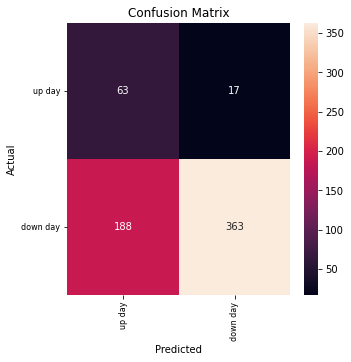

In [54]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_matrix(actual, [1 if p > 0 else 0 for p in predicted])

cm = confusion_matrix(actual, [1 if p > 0 else 0 for p in predicted])
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, ax = ax, fmt='g')

ax.set_title('Confusion Matrix') 
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['up day','down day'])
ax.yaxis.set_ticklabels(['up day','down day'])
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 8)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 8)  
plt.show()

## AA

In [55]:
mcpos = qe.MarkovChain(grid_pos.to_numpy())
print(mcpos.is_irreducible )
mcpos.stationary_distributions 

False


array([[1.09859536e-01, 3.84219378e-03, 8.69404541e-02, 0.00000000e+00,
        2.00956845e-03, 7.36833065e-02, 0.00000000e+00, 4.56720103e-05,
        1.87054171e-03, 4.60563536e-02, 7.31322736e-02, 2.62679089e-02,
        1.52878759e-02, 1.87054171e-03, 4.75253553e-02, 5.04722105e-02,
        4.62204822e-02, 2.02536671e-02, 1.61933099e-01, 2.10582425e-02,
        0.00000000e+00, 3.39023615e-02, 3.87190468e-02, 1.67385678e-04,
        1.38881923e-01]])

In [56]:
mcneg = qe.MarkovChain(grid_neg.to_numpy())
print(mcneg.is_irreducible )
mcneg.stationary_distributions 

True


array([[7.26210366e-04, 1.75047441e-02, 2.67481395e-03, 1.34113147e-03,
        9.11652452e-02, 3.31238969e-03, 9.59017091e-04, 3.31804392e-02,
        1.58957326e-02, 4.65808160e-02, 3.14802514e-04, 1.51663604e-01,
        4.85498053e-04, 1.58957326e-02, 8.40472417e-02, 5.91010829e-04,
        1.09446028e-01, 3.28715669e-04, 5.05298457e-05, 1.73548360e-01,
        5.86635197e-04, 8.80177045e-05, 2.49115347e-01, 4.58284050e-04,
        3.96538119e-05]])

In [61]:
pos_array = grid_pos.to_numpy()

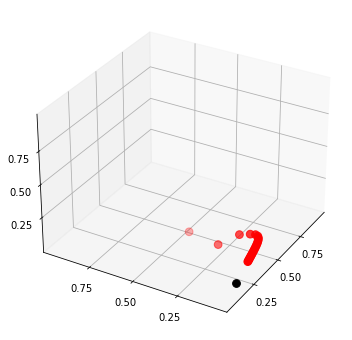

In [62]:
P = np.array(pos_array)

ψ = pos_array[1] #(0.0, 0.2, 0.8)        # Initial condition

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.set(xlim=(0, 1), ylim=(0, 1), zlim=(0, 1),
       xticks=(0.25, 0.5, 0.75),
       yticks=(0.25, 0.5, 0.75),
       zticks=(0.25, 0.5, 0.75))

x_vals, y_vals, z_vals = [], [], []
for t in range(20):
    x_vals.append(ψ[0])
    y_vals.append(ψ[1])
    z_vals.append(ψ[2])
    ψ = ψ @ P

ax.scatter(x_vals, y_vals, z_vals, c='r', s=60)
ax.view_init(30, 210)

mc = qe.MarkovChain(P)
ψ_star = mc.stationary_distributions[0]
ax.scatter(ψ_star[0], ψ_star[1], ψ_star[2], c='k', s=60)

plt.show()